In [81]:
%matplotlib qt

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Optional: if running in an environment that doesn't support inline, use Agg for non-interactive rendering
# import matplotlib
# matplotlib.use('Agg')

print('Matplotlib backend:', plt.get_backend())

Matplotlib backend: QtAgg


Hénon model: 
\begin{align}
    x_{n+1} &= y_n + 1 - ax_n^2\\
    y_{n+1} &= bx_n
\end{align}


In [8]:
def henon_map(a, b, x0, y0, n):
    """
    Generate points of the Henon map
    """
    x, y = x0, y0
    points = np.zeros((n, 2))
    for i in range(n):
        x_new = 1 - a * x**2 + y
        y_new = b * x
        points[i, :] = [x_new, y_new]
        x, y = x_new, y_new
    return points


def plot_henon_map(a, b, x0, y0, n, transitoire):
    """
    Plot the Henon map
    """
    points = henon_map(a, b, x0, y0, n)
    fig, ax = plt.subplots()
    ax.scatter(points[transitoire:, 0], points[transitoire:, 1])
    ax.set_title(f"Henon Map (a={a}, b={b})")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.axis("equal")
    ax.grid(True)
    plt.show()


def plot_bifurcation_diagram(a_values, b, x0, y0, n, last, axis):
    """
    Plot the bifurcation diagram of the Henon map
    """
    fig, ax = plt.subplots()
    if axis == "x":
        for a in a_values:
            points = henon_map(a, b, x0, y0, n)
            ax.scatter([a] * last, points[-last:, 0], s=0.5, c="blue")
    else:
        for a in a_values:
            points = henon_map(a, b, x0, y0, n)
            ax.scatter([a] * last, points[-last:, 1], s=0.5, c="blue")
    ax.set_title(f"Bifurcation Diagram (b={b})")
    ax.set_xlabel("a")
    ax.set_ylabel("x")
    ax.grid(True)
    plt.show()

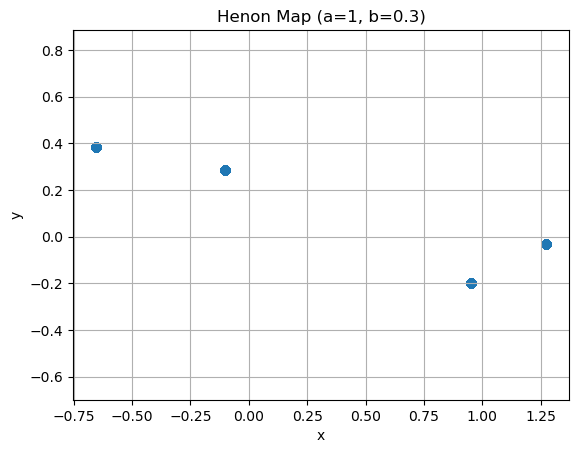

In [9]:
plot_henon_map(a=1, b=0.3, x0=0.1, y0=0.1, n=100000, transitoire=100)

/var/folders/bq/1msz2xh13vbbx9987xtkv7m00000gn/T/ipykernel_70491/3436512866.py:8: RuntimeWarning: overflow encountered in scalar power
  x_new = 1 - a * x**2 + y


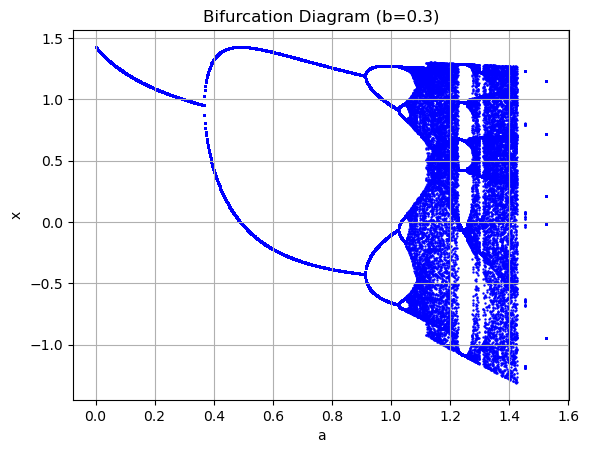

In [10]:
plot_bifurcation_diagram(a_values=np.linspace(0, 1.6, 1000), b=0.3, x0=0.1, y0=0.1, n=10000, last=100, axis="x")

In [11]:
def coupled_henon_map(a, b, c, d, x0, y0, u0, v0, n, Eps):
    """Generate points of the coupled Henon map."""
    x, y = x0, y0
    u, v = u0, v0
    points = np.zeros((n, 2, 2))  # [(x, y, u, v)]
    for i in range(n):
        x_new = 1 - a * ((1 - Eps) * x + Eps * u) ** 2 + ((1 - Eps) * y + Eps * v)
        y_new = b * ((1 - Eps) * x + Eps * u)
        u_new = 1 - c * ((1 - Eps) * u + Eps * x) ** 2 + ((1 - Eps) * v + Eps * y)
        v_new = d * ((1 - Eps) * u + Eps * x)

        points[i, :, :] = [
            [x_new, y_new],
            [u_new, v_new],
        ]  # append((x_new, y_new, u_new, v_new))
        x, y = x_new, y_new
        u, v = u_new, v_new

    return points


def plot_coupled_henon_map(a, b, c, d, x0, y0, u0, v0, n, Eps, transitoire):
    """Plot the coupled Henon map."""
    points = coupled_henon_map(a, b, c, d, x0, y0, u0, v0, n, Eps)
    plt.plot(
        points[transitoire:, 0, 0],
        points[transitoire:, 0, 1],
        "b.",
        markersize=5,
        label="Map 1",
    )
    plt.plot(
        points[transitoire:, 1, 0],
        points[transitoire:, 1, 1],
        "r.",
        markersize=5,
        label="Map 2",
    )
    plt.title(f"Coupled Henon Map (a={a}, b={b}, c={c}, d={d}, Eps={Eps})")
    plt.xlabel("First coordinate")
    plt.ylabel("Second coordinate")
    plt.axis("equal")
    plt.grid(True)
    plt.legend()
    plt.show()

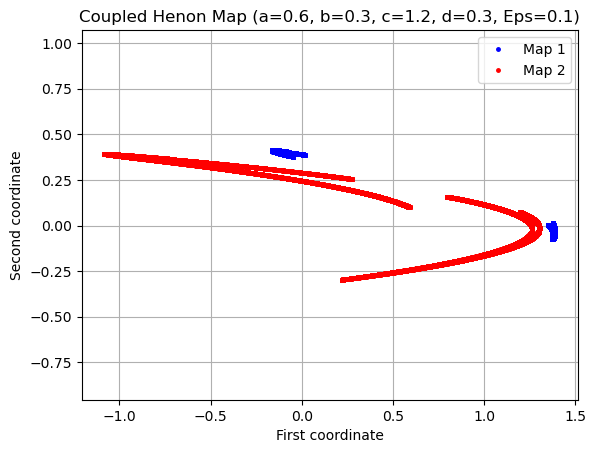

In [12]:
plot_coupled_henon_map(a=0.6, b=0.3,c = 1.2, d = 0.3, x0=0.1, y0=0.1, u0=0.1, v0=0.1, n=100000, Eps=0.1, transitoire=100) 

In [13]:
a = 1.2
b = 0.3
c = 0.3
d = 0.3
x0 = 0.0
y0 = 0.0
u0 = 0.0
v0 = 0.0
n = int(1e5)
points_gardes = 1000
transitoire = 100
Eps = [0.1, 0.2, 0.3, 0.4, 0.5]

In [14]:
def coupling_sum(x, y, delta):
    """Return the average sum wrt a certain coupling value"""
    assert 0 < delta < 1, "wrong coupling"
    return (1 - delta) * x + delta * y


def coupled_henon_wrt_coupling(a, b, c, d, x0, y0, u0, v0, n, Eps, points_gardes):
    """Compute the coupled Henon maps for several coupling strengths Eps.
    Returns an array of shape (points_gardes, 2, num_couplings) where axis 0=time, axis1=(x,y), axis2=coupling index

    be aware that it returns the coupled variables
    """
    p = len(Eps)
    points = np.zeros((points_gardes, 2, p))
    all_points = np.zeros((points_gardes, 2, 2, p))
    for i in range(p):
        all_points[:, :, :, i] = coupled_henon_map(
            a, b, c, d, x0, y0, u0, v0, n, Eps[i]
        )[-points_gardes:, :, :]
        points = coupling_sum(all_points[:, 0, :, :], all_points[:, 1, :, :], Eps[i])
    return points

In [15]:
simu = coupled_henon_wrt_coupling(a, b, c, d, x0, y0, u0, v0, n, Eps, points_gardes)
print('simu shape:', np.shape(simu))

simu shape: (1000, 2, 5)


In [18]:
print(np.shape(list(simu[:,0,0])))

(1000,)


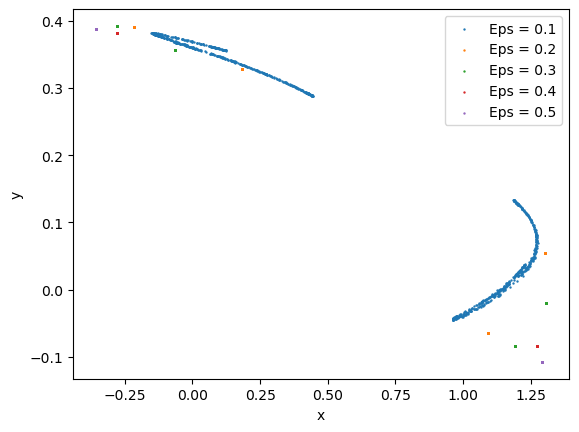

In [19]:
fig, ax = plt.subplots()
for i in range(len(Eps)):
    ax.scatter(simu[:,0,i], simu[:,1,i], s=0.5, label=f"Eps = {Eps[i]}")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.legend()
plt.show()

détecter un régime périodique ou chaotique : pour un régime périodique le nombre de points stables différents est un multiple de 2

In [20]:
def count(data, axis:str):
    if axis =="x": 
        p=(0, 0) 
    elif axis =="y":
        p = (0, 1)
    elif axis =="u":
        p= (1, 0)
    elif axis =="v":
        p = (1, 1)
    else: 
        return "axis not existent"
    simu = np.sort(data[: ,p[0], p[1], :], axis=0)
    k = len(simu[0])
    nb_points = [1]*k
    for i in range(k):
        start = simu[0, i]
        for j in range(1,len(simu)):
            if simu[j,i] != start:
                nb_points[i] += 1 
                start = simu[j,i]
            else:   
                None 
    return nb_points

In [27]:
def full_points(a, b, c, d, x0, y0, u0, v0, n, Eps, points_gardes):
    p = len(Eps)
    all_points = np.zeros((points_gardes, 2, 2, p))
    for i in range(p):
        all_points[:, :, :, i] = coupled_henon_map(
            a, b, c, d, x0, y0, u0, v0, n, Eps[i]
        )[-points_gardes:, :, :]
    return all_points

In [45]:
full_data = full_points(a, b, c, d, x0, y0, u0, v0, n, Eps, points_gardes)

In [39]:
print(full_data[:,0,0,2])

[ 0.98664644 -0.59563394  1.25548211 -1.03228212  0.98664644 -0.59563394
  1.25548211 -1.03228212  0.98664644 -0.59563394  1.25548211 -1.03228212
  0.98664644 -0.59563394  1.25548211 -1.03228212  0.98664644 -0.59563394
  1.25548211 -1.03228212  0.98664644 -0.59563394  1.25548211 -1.03228212
  0.98664644 -0.59563394  1.25548211 -1.03228212  0.98664644 -0.59563394
  1.25548211 -1.03228212  0.98664644 -0.59563394  1.25548211 -1.03228212
  0.98664644 -0.59563394  1.25548211 -1.03228212  0.98664644 -0.59563394
  1.25548211 -1.03228212  0.98664644 -0.59563394  1.25548211 -1.03228212
  0.98664644 -0.59563394  1.25548211 -1.03228212  0.98664644 -0.59563394
  1.25548211 -1.03228212  0.98664644 -0.59563394  1.25548211 -1.03228212
  0.98664644 -0.59563394  1.25548211 -1.03228212  0.98664644 -0.59563394
  1.25548211 -1.03228212  0.98664644 -0.59563394  1.25548211 -1.03228212
  0.98664644 -0.59563394  1.25548211 -1.03228212  0.98664644 -0.59563394
  1.25548211 -1.03228212  0.98664644 -0.59563394  1

In [46]:
count(full_data, "x")

[1000, 11, 4, 9, 2]

Pour savoir si nombre de période discret ou continu il suffit de compter selon une des deux dimensions

In [21]:
rng = np.random.default_rng(12345)

In [22]:
Epsilon = rng.uniform(0, 1, 100)

In [25]:
Epsilon = np.abs(rng.normal(0.15, 1e-2, 1000))

In [28]:
data = full_points(a, b, c, d, x0, y0, u0, v0, n, Epsilon, points_gardes)
u_counting = count(data, "u")
x_counting = count(data, "x")

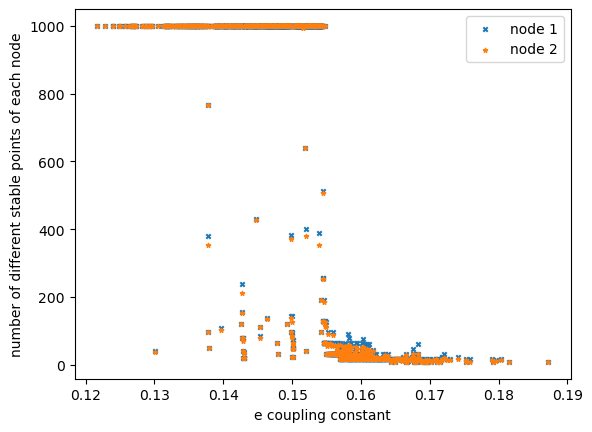

In [29]:
fig, ax = plt.subplots()
ax.scatter(Epsilon, x_counting, label="node 1",marker="x", s=10)
ax.scatter(Epsilon, u_counting, label="node 2", marker="*", s=10)
ax.set_xlabel("e coupling constant")
ax.set_ylabel("number of different stable points of each node")
plt.legend()
plt.show()

Création d'une fonction qui transforme un graphe en système de Hénons couplés


D'abord quelques fonctions pour transformer un graphe en Matrice de conectivité

In [88]:


def conectivity_nonorineted_matrix(G):
    A = np.zeros((len(G.nodes), len(G.nodes)))
    for i,j in G.edges:
        A[i,j]=1
        A[j,i]=1
    return A

def neighbors(A,i):
    I=[]
    for j in range(len(G)):
        if A[j,i] == 1.:
            I.append(j)
    return I



les fonctions pour l'intégration

In [ ]:
def transfo_coupling(G, X, Y, Eps):
    X_new = np.zeros((1, len(G.nodes)))
    Y_new = np.zeros((1, len(G.nodes)))
    for i in range(len(G.nodes)):
        I = list(G.neighbors(i))  
        k = len(I)
        K_x = 0
        K_y = 0
        for j in I:  
            K_x += X[0, j] 
            K_y += Y[0, j]
        X_new[0, i] = (1 - k * Eps) * X[0, i] + Eps * K_x
        Y_new[0, i] = (1 - k * Eps) * Y[0, i] + Eps * K_y
    return X_new, Y_new

def evolution(G, X_0, Y_0, N, list_ab, Eps):
    X = [np.array(X_0).reshape(1, -1)]
    Y = [np.array(Y_0).reshape(1, -1)]
    UN = np.ones((1, len(G.nodes)))  
    X_c, Y_c = transfo_coupling(G, X[0], Y[0], Eps)
    for t in range(N):
        X.append(-list_ab[0, :] * X_c**2 + UN + Y_c)  
        Y.append(list_ab[1, :] * X_c)
        X_c, Y_c = transfo_coupling(G, X[-1], Y[-1], Eps)
    return X, Y



Exemple sur un graphe simple

In [ ]:

G = nx.erdos_renyi_graph(3, 1, seed=42)
Eps = 0.01 


list_ab = np.zeros((2, len(G.nodes)))
for i in range(len(G.nodes)):
    list_ab[0, i] = np.random.uniform(0.6, 1.4)
    list_ab[1, i] = 0.3

X_0 = [0.1 for _ in range(len(G.nodes))]
Y_0 = [0.1 for _ in range(len(G.nodes))]
N = 500


X, Y = evolution(G, X_0, Y_0, N, list_ab, Eps)

plt.figure()
nx.draw(G, with_labels=True)
plt.show()

Application sur le graphe de la cellule ci-dessus

In [ ]:

X, Y = evolution(G, X_0, Y_0, N, list_ab, Eps)


X_array = np.squeeze(np.array(X[400:]))  
Y_array = np.squeeze(np.array(Y[400:]))  


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  


colors = plt.cm.viridis(np.linspace(0, 1, len(G.nodes))) 
labels = [f"Nœud {i}" for i in G.nodes()]

# Tracé de X
for i in range(len(G.nodes)):
    ax1.plot(X_array[:, i], color=colors[i], label=labels[i])
ax1.set_title("Évolution de X")
ax1.set_xlabel("Itération")
ax1.set_ylabel("Valeur de X")
ax1.legend()
ax1.grid(True)

# Tracé de Y
for i in range(len(G.nodes)):
    ax2.plot(Y_array[:, i], color=colors[i], label=labels[i])
ax2.set_title("Évolution de Y")
ax2.set_xlabel("Itération")
ax2.set_ylabel("Valeur de Y")
ax2.legend()
ax2.grid(True)

plt.tight_layout()  
plt.show()